In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
%config InlineBackend.figure_format = 'retina'

In [60]:
from pathlib import Path
from kspecdr.tlm.make_tlm import make_tlm

WD = Path.cwd()
datadir = Path("/data1/hbahk/kspec/kspecdr/resources/")
# fpath = datadir / "08feb10087im.fits"
fpath = datadir / "08feb10093.fits"
args = {"IMAGE_FILENAME": fpath.as_posix()}

In [61]:
from kspecdr.io.image import ImageFile

im = ImageFile(fpath.as_posix(), mode='READ')
im.open()
print(im.get_header_value('RO_NOISE', 7.0))
print(im.get_header_value('RO_GAIN'))

INFO:kspecdr.io.image:Opened file: /data1/hbahk/kspec/kspecdr/resources/08feb10093.fits (mode: READ)
6.87
1.87


In [62]:
from kspecdr.preproc.make_im import make_im

make_im(fpath.as_posix(),
        cosmic_ray_method='NONE',
        verbose=True)


INFO:kspecdr.preproc.make_im:==================================================
INFO:kspecdr.preproc.make_im:Preprocessing image data contained in RAW frame
INFO:kspecdr.preproc.make_im:==================================================
INFO:kspecdr.preproc.make_im:RAW file = /data1/hbahk/kspec/kspecdr/resources/08feb10093.fits
INFO:kspecdr.preproc.make_im:Creating IM file from raw data with TDFIO_CREATEBYCOPY functionality...
INFO:kspecdr.preproc.make_im:Creating IM file from raw file: /data1/hbahk/kspec/kspecdr/resources/08feb10093.fits -> /data1/hbahk/kspec/kspecdr/resources/08feb10093_im.fits
INFO:kspecdr.io.image:Opened file: /data1/hbahk/kspec/kspecdr/resources/08feb10093.fits (mode: READ)
INFO:kspecdr.preproc.make_im:Instrument: TAIPAN, SPECTID: RD, CLASS: , BITPIX: 16
INFO:kspecdr.preproc.make_im:Processing TAIPAN raw data: transposing axes
INFO:kspecdr.io.image:Closed file: /data1/hbahk/kspec/kspecdr/resources/08feb10093.fits
INFO:kspecdr.io.image:Opened file: /data1/hbahk/ksp

'/data1/hbahk/kspec/kspecdr/resources/08feb10093_im.fits'

In [64]:
fpath = datadir / "08feb10093_im.fits"
args = {"IMAGE_FILENAME": fpath.as_posix()}

from kspecdr.tlm.make_tlm import read_instrument_data

im = ImageFile(fpath.as_posix(), mode='READ')
im.open()
img_data, var_data, fibre_types = read_instrument_data(im, 6)

INFO:kspecdr.io.image:Opened file: /data1/hbahk/kspec/kspecdr/resources/08feb10093_im.fits (mode: READ)


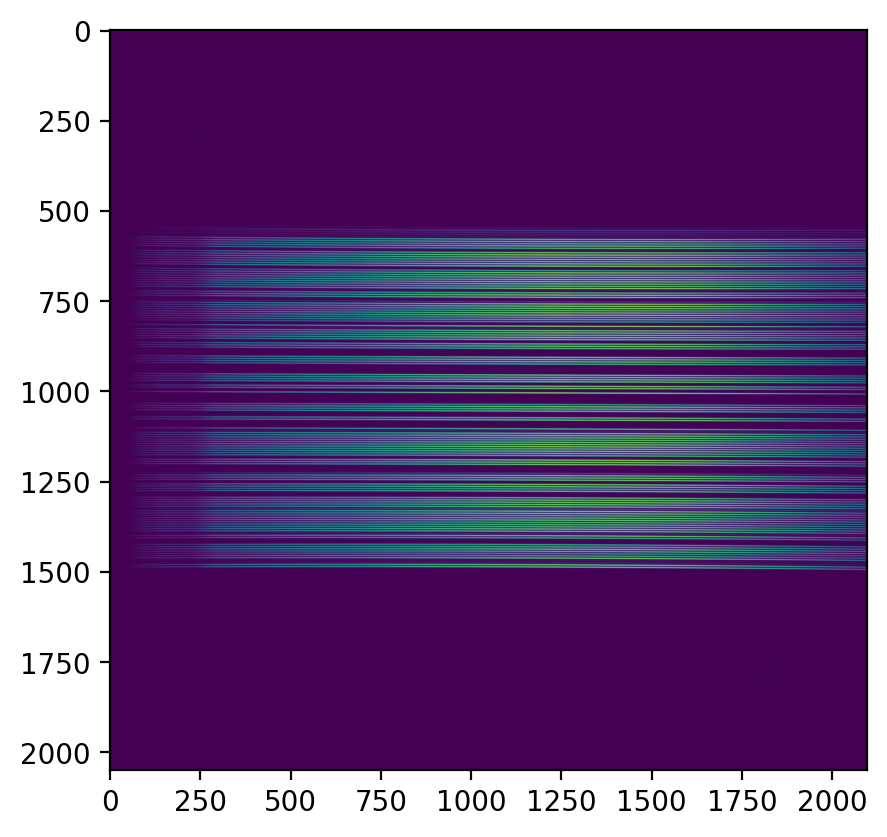

In [65]:
from matplotlib import pyplot as plt

plt.imshow(var_data)
plt.show()

In [66]:
from kspecdr.tlm.make_tlm import set_instrument_specific_params

set_instrument_specific_params(6, {})

(2, 2, True, False, False, False)

In [69]:
from kspecdr.tlm.make_tlm import convert_fibre_types_to_trace_status
import numpy as np

convert_fibre_types_to_trace_status(6, np.array(['P', 'P', 'P', 'P', 'P', 'S', 'P', 'P', 'P', 'P']), 10)

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES'], dtype='<U5')